<a href="https://colab.research.google.com/github/FAID-Nacera/Homework-Linear-Regression-Simple-Multiple-/blob/main/Homework_Linear_Regression_(Simple_%26_Multiple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install statsmodels

In [6]:
# -------------------------------
# Homework: Linear Regression (Simple & Multiple)
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm  # For VIF calculation
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [7]:
from google.colab import files
uploaded = files.upload()
# Load the dataset
df = pd.read_csv(next(iter(uploaded.keys())))
print(df.head())

Saving homework.csv to homework.csv
   rownames  price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0         1  42000     5850         3        1        2      yes      no   
1         2  38500     4000         2        1        1      yes      no   
2         3  49500     3060         3        1        1      yes      no   
3         4  60500     6650         3        1        2      yes     yes   
4         5  61000     6360         2        1        1      yes      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no  


In [23]:
# Convert 'yes'/'no' to 1/0
for col in df.columns:
    if df[col].dtype == 'object':
        if set(df[col].unique()) == {'yes', 'no'}:
            df[col] = df[col].map({'yes': 1, 'no': 0})

In [24]:
# Remove any remaining non-numeric columns
df = df.select_dtypes(include=['number'])

In [25]:
# Ensure 'price' and 'lotsize' are numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['lotsize'] = pd.to_numeric(df['lotsize'], errors='coerce')

In [26]:
# Drop rows with NaN
df = df.dropna()

In [27]:
# Check that 'price' and 'lotsize' exist
if 'price' not in df.columns or 'lotsize' not in df.columns:
    raise ValueError("'price' or 'lotsize' columns are missing.")

print("Cleaned dataset - Shape:", df.shape)
print("Columns:", list(df.columns))

Cleaned dataset - Shape: (546, 13)
Columns: ['rownames', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']


In [28]:
# -------------------------------
# Simple Linear Regression (lotsize -> price)
# -------------------------------
X = df[['lotsize']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred = model_simple.predict(X_test)

print("\n--- Simple Linear Regression ---")
print(f"Slope (Coefficient for lotsize): {model_simple.coef_[0]:.4f}")
print(f"Intercept: {model_simple.intercept_:.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")



--- Simple Linear Regression ---
Slope (Coefficient for lotsize): 6.8854
Intercept: 33003.3622
MSE: 543921224.5593
R²: 0.1858


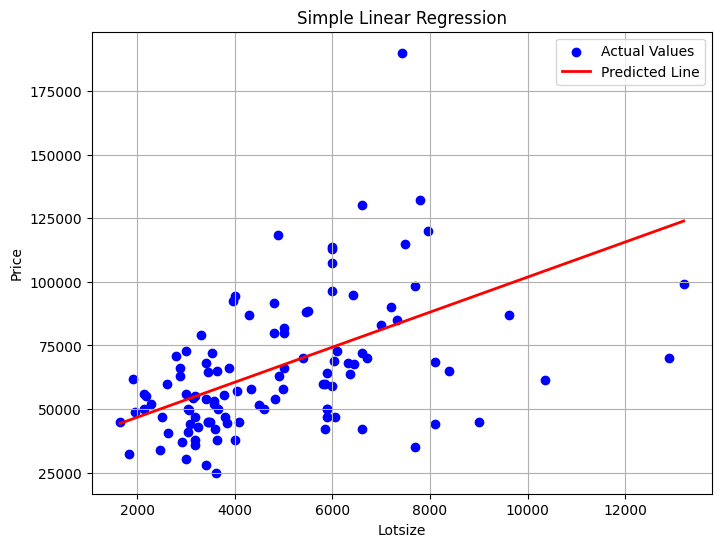

In [29]:
# -------------------------------
# Plot: Scatter + Regression Line
# -------------------------------
# Sort X_test and corresponding y_pred for plotting
sorted_idx = X_test['lotsize'].argsort()
X_test_sorted = X_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Lotsize")
plt.ylabel("Price")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

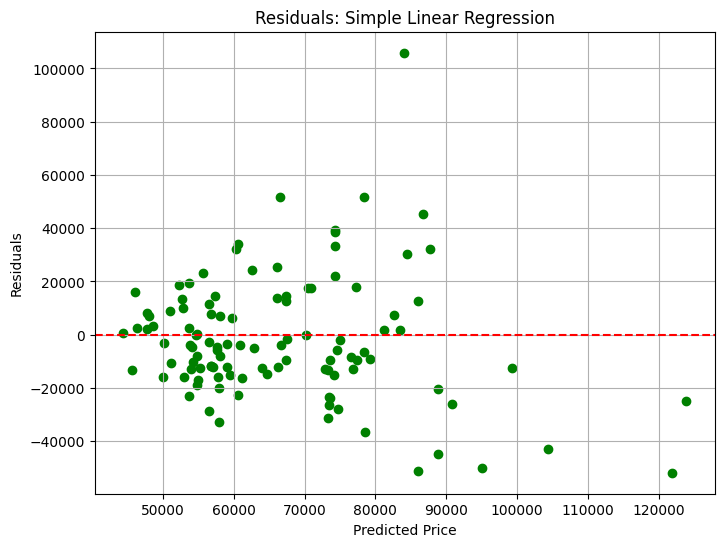

In [30]:
# Residuals plot for simple regression
residuals_s = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals_s, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals: Simple Linear Regression")
plt.grid(True)
plt.show()

In [31]:
# -------------------------------
# Multiple Linear Regression
# -------------------------------
# Select top 5 features most correlated with 'price'
corr = df.corr()['price'].abs().sort_values(ascending=False)
top_features = corr.index[1:6]  # Exclude 'price' itself

X_multi = df[top_features]
y_multi = df['price']

In [32]:
# VIF to check multicollinearity
X_multi_const = sm.add_constant(X_multi)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_multi_const.columns
vif_data['VIF'] = [1 / (1 - sm.OLS(X_multi_const[col], X_multi_const.drop(col, axis=1)).fit().rsquared)
                   for col in X_multi_const.columns]
print("\nVIF for features:")
print(vif_data)


VIF for features:
    Feature        VIF
0     const  13.193578
1   lotsize   1.197009
2   bathrms   1.174065
3     airco   1.157044
4   stories   1.197677
5  garagepl   1.166601


In [33]:
# Train/test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)

print("\n--- Multiple Linear Regression ---")
coeff_df = pd.DataFrame({'Feature': top_features, 'Coefficient': model_multi.coef_})
print(coeff_df)
print(f"Intercept: {model_multi.intercept_:.4f}")
print(f"MSE: {mean_squared_error(y_test_m, y_pred_m):.4f}")
print(f"R²: {r2_score(y_test_m, y_pred_m):.4f}")



--- Multiple Linear Regression ---
    Feature   Coefficient
0   lotsize      4.324067
1   bathrms  15683.010906
2     airco  13067.489749
3   stories   6819.159265
4  garagepl   5472.333625
Intercept: 5667.4358
MSE: 303505493.3097
R²: 0.5457


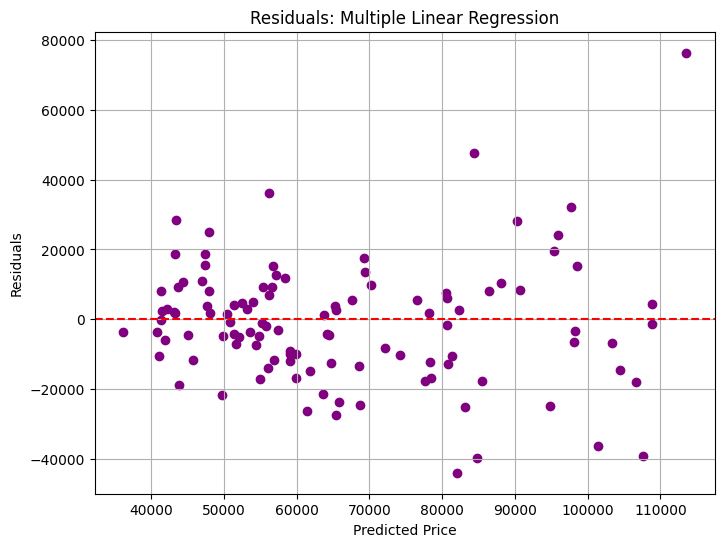

In [34]:
# Residual plot for multiple regression
residuals_m = y_test_m - y_pred_m
plt.figure(figsize=(8,6))
plt.scatter(y_pred_m, residuals_m, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals: Multiple Linear Regression")
plt.grid(True)
plt.show()

In [35]:
# -------------------------------
# Model Comparison
# -------------------------------
print("\n--- Model Comparison ---")
print(f"Simple R²: {r2_score(y_test, y_pred):.4f} | MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Multiple R²: {r2_score(y_test_m, y_pred_m):.4f} | MSE: {mean_squared_error(y_test_m, y_pred_m):.4f}")

if r2_score(y_test_m, y_pred_m) > r2_score(y_test, y_pred):
    print("Multiple regression performs better (higher R²).")
else:
    print("Simple regression is sufficient or better.")


--- Model Comparison ---
Simple R²: 0.1858 | MSE: 543921224.5593
Multiple R²: 0.5457 | MSE: 303505493.3097
Multiple regression performs better (higher R²).
